# 全连接神经网络FashionMINIST数据集

# 1 下载Fasion-MNIST数据集

`Fashion-MNIST`是一个替代原始的[MNIST手写数字数据集](http://yann.lecun.com/exdb/mnist/)的`另一个`图像数据集。 它是由Zalando（一家德国的时尚科技公司）旗下的[研究部门](https://research.zalando.com/)提供。其涵盖了来自10种类别的共7万个不同商品的正面图片。Fashion-MNIST的大小、格式和训练集/测试集划分与原始的MNIST完全一致。60000/10000的训练测试数据划分，28x28的灰度图片。你可以直接用它来测试你的机器学习和深度学习算法性能，且**不需要**改动任何的代码。

Fashion-MNIST 数据集的[中文文档说明](https://github.com/zalandoresearch/fashion-mnist/blob/master/README.zh-CN.md)


In [2]:
`````````````````````````````````````````````````````import torch  # 导入pytorch
print(torch.__version__)
from torch import nn, optim  # 导入神经网络与优化器对应的类
import torch.nn.functional as F
from torchvision import datasets, transforms ## 导入数据集与数据预处理的方法

1.2.0


In [14]:
# 数据预处理：标准化图像数据，使得灰度数据在-1到+1之间
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

# 下载Fashion-MNIST训练集数据，并构建训练集数据载入器trainloader,每次从训练集中载入64张图片，每次载入都打乱顺序

trainset = datasets.FashionMNIST('dataset/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# 下载Fashion-MNIST测试集数据，并构建测试集数据载入器trainloader,每次从测试集中载入64张图片，每次载入都打乱顺序
testset = datasets.FashionMNIST('dataset/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

## 打印数据集相关信息

In [4]:
print(trainset)
print(testset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: dataset/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: dataset/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


# 显示数据集的形式及图片

In [15]:
image, label = next(iter(trainset))
image.shape

torch.Size([1, 28, 28])

In [17]:
label

9

In [9]:
image = image.reshape(28,28)
image.shape

torch.Size([28, 28])

靴子


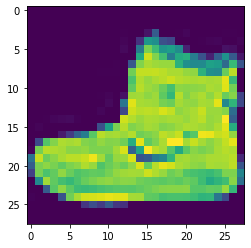

In [18]:
import matplotlib.pyplot as plt
image = image.reshape(28,28)

plt.imshow(image)
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(labellist[label])

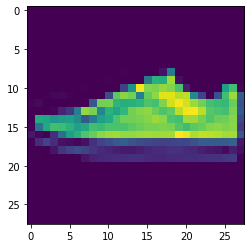

In [28]:
image,label = next(iter(trainloader))
image.shape
image=image[0]
image = image.reshape(28,28)
plt.imshow(image)

In [24]:
image,label = next(iter(trainset))
image.shape

torch.Size([1, 28, 28])

label包含了image里面64张图片对应的标签

| 标注编号 | 描述 |
| --- | --- |
| 0 | T-shirt/top（T恤）|
| 1 | Trouser（裤子）|
| 2 | Pullover（套衫）|
| 3 | Dress（裙子）|
| 4 | Coat（外套）|
| 5 | Sandal（凉鞋）|
| 6 | Shirt（汗衫）|
| 7 | Sneaker（运动鞋）|
| 8 | Bag（包）|
| 9 | Ankle boot（踝靴）|

## 打开训练集中的一张图片看看

## 查看一张图片和标签完整的代码

In [37]:
image,label = next(iter(trainloader))
print(image.shape)
print(label.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


这张图片对应的标签是 包包


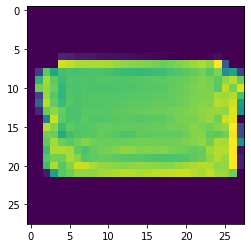

In [9]:
image, label = next(iter(trainloader))

# image图片中有64张图片，我们查看索引为2的图片
imagedemo = image[3]
imagedemolabel = label[3]

imagedemo = imagedemo.reshape((28,28))

import matplotlib.pyplot as plt

plt.imshow(imagedemo)

labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')

# 2 搭建并训练四层全连接神经网络

- 神经网络的输入为28 * 28 = 784 个像素<br>
- 第一个隐含层包含256个神经元<br>
- 第二个隐含层包含128个神经元<br>
- 第三个隐含层包含64个神经元<br>
- 输出层输出10个结果，对应图片的10种分类<br>

In [10]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [29]:
class Full(nn.Module):
    def __init__(self):
        super(Full, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 100)
        self.fc3 = nn.Linear(100, 64)
        self.fc4 = nn.Linear(64,10)
    def forward(self, x):
        x = x.view(-1,28*28)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
#         x = self.fc4(x)
        x = F.log_softmax(self.fc4(x))
        return x

In [ ]:
yolo

image 

vgg

In [12]:
net = Full()
x = torch.randn(1, 28, 28)
from tensorboardX import SummaryWriter
writer = SummaryWriter(logdir = 'logs')
writer.add_graph(net , (x, ))
writer.close()

C:\Users\Administrator design\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


# 建立优化器 损失函数等参数

In [30]:
net = Full()  # 建立一个实例化的对象
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

for epoch in range(10):
    running_loss = 0.0
    for i , (image, label) in enumerate(trainloader, 0):
        output = net(image)
#         print(output.shape)
#         print(label.shape)
        loss = loss_function(output, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i%200 == 199:
            print('epoch: ',epoch, i+1 ,':loss:', running_loss/200)
            running_loss = 0

C:\Users\Administrator design\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


epoch:  0 200 :loss: 1.1918819640576839
epoch:  0 400 :loss: 0.5824811218678951
epoch:  0 600 :loss: 0.5044825208932161
epoch:  0 800 :loss: 0.47989957094192504
epoch:  1 200 :loss: 0.4164536105841398
epoch:  1 400 :loss: 0.40679113909602166
epoch:  1 600 :loss: 0.4021814834326506
epoch:  1 800 :loss: 0.39339269399642945
epoch:  2 200 :loss: 0.37204278007149694
epoch:  2 400 :loss: 0.3623135594278574
epoch:  2 600 :loss: 0.37006036423146726
epoch:  2 800 :loss: 0.3659402046352625
epoch:  3 200 :loss: 0.3385714258998632
epoch:  3 400 :loss: 0.3435545964539051
epoch:  3 600 :loss: 0.3279362923651934
epoch:  3 800 :loss: 0.34337738297879694
epoch:  4 200 :loss: 0.3152540622279048
epoch:  4 400 :loss: 0.3093694417923689
epoch:  4 600 :loss: 0.31134692918509244
epoch:  4 800 :loss: 0.3200311607867479
epoch:  5 200 :loss: 0.29441493600606916
epoch:  5 400 :loss: 0.2985322082415223
epoch:  5 600 :loss: 0.29790304470807316
epoch:  5 800 :loss: 0.3083978532999754
epoch:  6 200 :loss: 0.28258138

KeyboardInterrupt: 

In [39]:
Path = './FashionMINIST.pth'
torch.save(net.state_dict(),Path)

# total=0
# correct = 0
# for img,label in testloader:
#     output = net(img)
#     precise, predict = torch.max(output, 1)
#     precise = exp(precise)
#     total += label.size(0)
#     correct += (predict==label).sum().item()
# print('accuracy:', correct/total)

C:\Users\Administrator design\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


预测的标签 运动鞋 概率是 0.10772357262097706
实际的标签 靴子


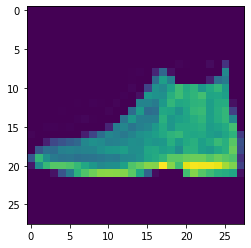

In [61]:
import math
net = Full()
net.load_state_dict(torch.load(Path))
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
image, label = next(iter(testset))
pre,predict = torch.max(net(image),1)
image = image.reshape(28,28)
plt.imshow(image)
print('预测的标签',labellist[predict],'概率是', math.exp(pre))
print('实际的标签', labellist[label])

In [60]:
import math
net = Full()
net.load_state_dict(torch.load(Path))
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
image, label = next(iter(testset))
out = net(image)
_, predict = torch.max(out,1)
print(predict)

C:\Users\Administrator design\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


tensor([7])


In [26]:
import math

C:\Users\Administrator design\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


这张图片对应的标签是 运动鞋
概率为{} 99.95332751566156


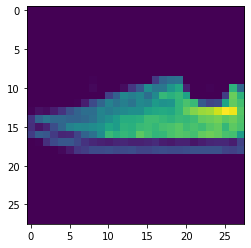

In [39]:

net = Full()
net.load_state_dict(torch.load(Path))

img, label = next(iter(trainloader))

output = net(img[0])
imagedemo = img[0].reshape((28,28))

import matplotlib.pyplot as plt

plt.imshow(imagedemo)
precise, predict = torch.max(output, 1)
# precise = math.exp(precise)
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[predict]}')
print('概率为{}', math.exp(precise.item())*100)


In [34]:
import torch.nn.functional as F
x = torch.tensor([-1, 2, -0.8])
x = F.log_softmax(x)
print(x)
x0 = math.exp(x[0])
x1 = math.exp(x[1])
x2 = math.exp(x[2])
print(x0, x1, x2)

C:\Users\Administrator design\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([-3.1049, -0.1049, -2.9049])
0.04482910266084609 0.9004165162242811 0.054754392246695635


In [63]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\Administrator design/.cache\torch\checkpoints\resnet18-5c106cde.pth
100%|██████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [03:19<00:00, 235kB/s]
